<a href="https://colab.research.google.com/github/Piyumi22/Optimization-/blob/main/Copy_of_E_17_259_OPTIMIZATION_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# You will need this python libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg #(to find eigenvalues,decompositions )
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
def quadraticform_analyze(c, a, B):

   ### Display inputs
    print("***Inputs***")
    print("c = ",c,"\n")
    print("a = ",a,"\n")
    print("B = \n",B,"\n")

    ### Eigendecomposition
    print("***Eigendecomposition***")
    l, V = linalg.eig(B)
    print("Lambda = \n",np.diag(l),"\n")
    print("V = \n",V,"\n")

    ### Calculate stationary point
    n = len(a)
    zstar = np.zeros(n)

    abar = (V.transpose()).dot(a)
    print("abar = \n",abar,"\n")

    # Loop over dimensions
    for j in range(0,n):
        # If eigenvalue is NOT zero
        ##
        # Previous code
        # if(l[j] != 0):
        ##
        # More stable version
        if(abs(l[j]) > 1E-8):
            zstar[j] = -abar[j]/np.real(l[j])

        # Otherwise check is abar is nonzero
        elif(abar[j] !=0):
            print("WARNING: No stationary point exists.")

    xstar = V.dot(zstar)

    print("***(Possible) Stationary Point in Transformed Coordinates:")
    print("z* = ",zstar,"\n")

    print("***(Possible) Stationary Point in Original Coordinates:")
    print("x* = ",xstar,"\n")

    ### Check function value and gradient
    fval = c + a.dot(xstar) + 0.5*xstar.dot(B.dot(xstar))
    grad = a + xstar.dot(B)

    print("***Checking function and gradient***")
    print("f(x*) = ",fval)
    print("f'(x*) = \n",grad,"\n")

    ### Make 3D plot
    # Tutorial: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    if(n == 2):
        # Create vectors in both dimensions
        dx = 5
        x1 = np.arange(xstar[0]-dx,xstar[0]+dx,0.25)
        x2 = np.arange(xstar[1]-dx,xstar[1]+dx,0.25)

        # Create a matrix of all points to sample
        X1, X2 = np.meshgrid(x1, x2)
        n1 = len(x1)
        n2 = len(x2)
        F = np.zeros([n2, n1])
        xtemp = np.zeros(2)
        for i in range(0,n1):
            xtemp[0] = x1[i]
            for j in range(0,n2):
                xtemp[1] = x2[j]
                F[j,i] = c + a.dot(xtemp) + 0.5*xtemp.dot(B.dot(xtemp))

        # Create 3D figure
        fig = plt.figure()
        ax = fig.add_subplot(1,2,1,projection='3d')

        # Plot f(x)
        surf = ax.plot_surface(X1, X2, F, linewidth=0,cmap=cm.coolwarm,antialiased=True)
        ax = fig.add_subplot(1,2,2,projection='3d')
        ax.contour(X1,X2,F, cmap='gray')
        # Add (possible) stationary point
        ax.scatter(xstar[0],xstar[1],fval,s=50,color="green",depthshade=True)

        # Draw vertical line through stationary point to help visualization
        # Maximum value in array
        fmax = np.amax(F)
        fmin = np.amin(F)
        ax.plot([xstar[0], xstar[0]], [xstar[1], xstar[1]], [fmin,fmax],color="green")

        plt.show()

***Inputs***
c =  0 

a =  [1 1] 

B = 
 [[2 1]
 [1 2]] 

***Eigendecomposition***
Lambda = 
 [[3.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]] 

V = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

abar = 
 [1.41421356 0.        ] 

***(Possible) Stationary Point in Transformed Coordinates:
z* =  [-0.47140452 -0.        ] 

***(Possible) Stationary Point in Original Coordinates:
x* =  [-0.33333333 -0.33333333] 

***Checking function and gradient***
f(x*) =  -0.3333333333333333
f'(x*) = 
 [2.22044605e-16 2.22044605e-16] 



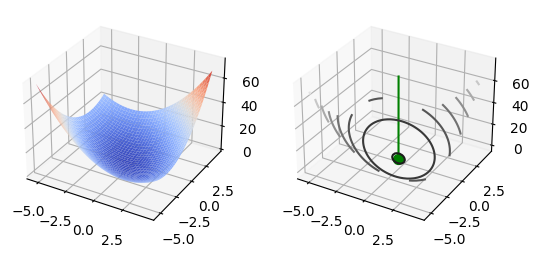

In [ ]:
#for example you can call the function in this way
c = 0
a = np.array([1, 1])
B = np.array([[2,1],[1,2]])

quadraticform_analyze(c,a,B)

In [ ]:
# Define the  function
def my_f(x):
    return np.exp(x)

# Specify point to examine
a = 1.0

# Calculate function value at x = a
fa = my_f(a)

# Calculate exact first derivative at x=1
df1 = my_f(a) # Need to replace if you consider a different test function!

# Generate values for epsilon
eps = np.power(10,np.arange(-16,1,0.25))
n = len(eps)

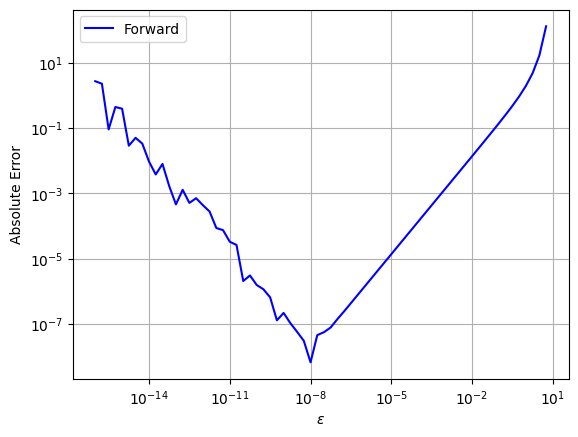

In [ ]:
# Preallocate error array
error_forward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_forward = (my_f(a + eps[i]) - fa)/eps[i]
    error_forward[i] = abs(df1_forward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid()
plt.show()

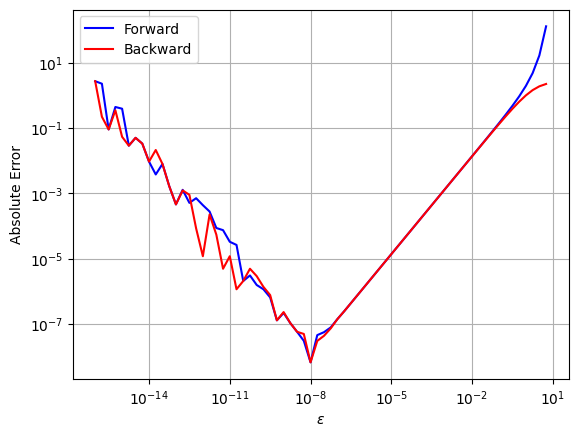

In [ ]:
# Preallocate error array
error_backward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_backward = (fa - np.exp(a - eps[i]))/eps[i]
    error_backward[i] = abs(df1_backward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()

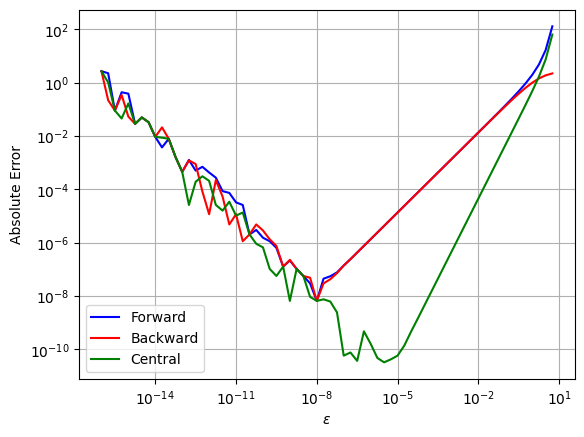

In [ ]:
# Preallocate error array
error_central = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_central = (np.exp(a + eps[i]) - np.exp(a - eps[i]))/(2*eps[i])
    error_central[i] = abs(df1_central - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.loglog(eps,error_central,label="Central",color="green")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()